# Kapitel 3 - Regression

## Faktafrågor

1. Vad kännetecknar regressionsproblem? Ge några exempel på tillämpningsområden. 


<span style="color:green">

Regressionsproblem handlar om att prediktera en kontinuerlig beroende variabel  
(y) med hjälp av beroende variabler (x).

Bilvärdering - Prediktera försäljningspriset på en bil beroende på variabler som  
- miltal  
- ålder  
- bränsletyp och  
- märke  

Försäkringar - Prediktera förväntad skadekostnad i kronor för en kund baserat på
variabler som
- ålder
- utbildning
- geografiskt läge och
- tidigare historik

</span>

2. Förklara utvärderingsmåtten *RMSE*, *MSE* och *MAE*.

<span style="color:green">

RMSE - används för att utvärdera regressionsmodeller.
       För att tolka hur stort fel modellen gör.

MSE - Om man bara är intresserade av rangordning, så kan man
      använda MSE, eftersom orningen blir densamma, men uträkningen
      är billigare, då man inte använder "roten ur".

MAE - Ett lägre tal indikerar en bättre modell, precis som
      RMSE och MSE.
      I de fall alla fel värderas linjärt med avseende på felens storlek
      är MAE ett lämpligt mått att använda. RMSE lägger ett större straff
      på avvikelser än vad MAE gör.

</span>

3. Om vi ska rangordna olika modeller, spelar det någon roll om *RMSE* eller *MSE* används? Varför? 

<span style="color:green">

I de fall alla fel värderas linjärt med avseende på felens storlek
är MAE ett lämpligt mått att använda. RMSE lägger ett större straff
på avvikelser än vad MAE gör.

</span>

4. Förklara mycket översiktligt vad *gradient descent* är. 

<span style="color:green">

Det är en optimeringsalgoritm som används för att hitta en funktions
minimum eller maximum.

</span>

5. Vad är *the bias variance trade-off*? Varför är mer komplexa modeller inte alltid bättre? 

<span style="color:green">

Den säger att felen en modell gör när den ska prediktera ny, osedd data, kan delas
in i tre delar.

- Bias - Felaktiga modellantaganden

- Variance - Modellen är känslig för fluktationer - små förändringar i datan kan leda
till att modellen ser väldigt annorlunda ut - hög varians.

- Irreducerbart fel - slumpmässighet i datan som vi inte direkt kan göra något åt.


En mer komplex modell har högre varians, vilket kan leda till att modellen blir
överanpassad.
Men om vi istället minskar variansen - använder en enklare modell, så kan modellen bli
underanpassad.

Det är en trade off.

</span>

6. Några vanligt förekommande modeller för regressionsproblem är enligt nedan. Förklara översiktligt hur respektive modell fungerar. Läs även igenom respektive modells dokumentation, notera att du inte behöver förstå alla detaljer från dokumentationen men det är bra att ha läst igenom den. 

a) Linjär regression - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

<span style="color:green">

Linjär regression är en metod för att förutspå ett värde (y) baserat på en eller flera variabler (X).  
Man försöker hitta en rak linje (eller plan i högre dimensioner) som bäst passar datapunkterna.

Enkel linjär regression (en variabel) kan skrivas som:


$$
y = a \cdot x + b
$$


- **a** = lutning (hur mycket y förändras när x ökar med 1)  
- **b** = intercept/skärning med y-axeln  
- **y** = det värde vi förutspår

</span>

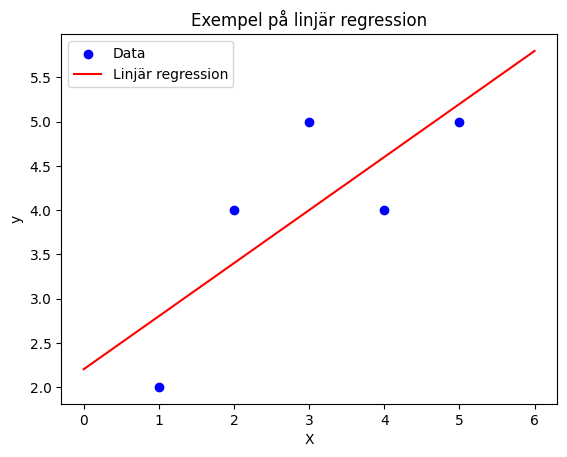

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Skapa lite exempeldata
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # måste vara 2D för sklearn
y = np.array([2, 4, 5, 4, 5])

# Träna en linjär regression
model = LinearRegression()
model.fit(X, y)

# Gör prediktioner
X_line = np.linspace(0, 6, 100).reshape(-1, 1)
y_pred = model.predict(X_line)

# Rita data och linje
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_line, y_pred, color="red", label="Linjär regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Exempel på linjär regression")
plt.legend()
plt.show()

b) *Ridge* regression - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html)

<span style="color:green">
Ridge Regression är en variant av linjär regression som lägger till en **straffterm** för stora koefficienter.  
Det används för att undvika överanpassning (*overfitting*).

Formeln för kostnadsfunktionen blir:

$$
\text{Cost} = \sum (y_i - \hat{y_i})^2 + \alpha \sum \beta_j^2
$$

- Första termen = vanliga kvadratfelet (MSE)  
- Andra termen = straff för stora vikter (L2-regularisering)  
- **α (alpha)** styr hur starkt straffet är  
</span>

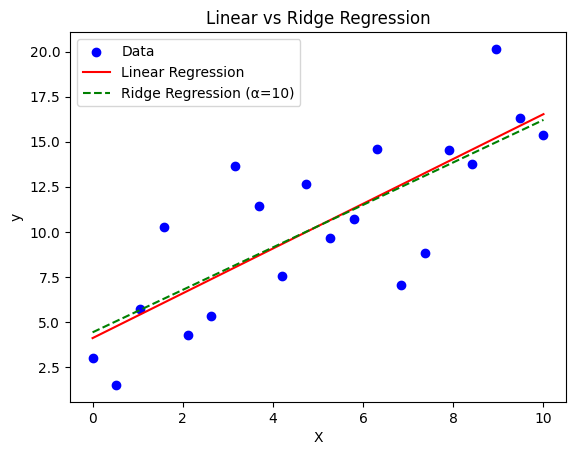

In [18]:

from sklearn.linear_model import LinearRegression, Ridge

# Skapa lite "noisy" data
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(20) * 4  # linjär trend + brus

# Linjär regression
lin = LinearRegression().fit(X, y)

# Ridge regression (med alpha=10 som exempel)
ridge = Ridge(alpha=10).fit(X, y)

# Prediktioner
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_lin_pred = lin.predict(X_line)
y_ridge_pred = ridge.predict(X_line)

# Rita
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_line, y_lin_pred, color="red", label="Linear Regression")
plt.plot(X_line, y_ridge_pred, color="green", linestyle="--", label="Ridge Regression (α=10)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Ridge Regression")
plt.legend()
plt.show()


c) *Lasso* regression - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

<span style="color:green">
Lasso Regression är en variant av linjär regression som använder **L1-regularisering**.  
Till skillnad från Ridge (som straffar kvadraten på koefficienterna) straffar Lasso summan av deras absoluta värden.  

Formeln för kostnadsfunktionen är:

$$
\text{Cost} = \sum (y_i - \hat{y_i})^2 + \alpha \sum |\beta_j|
$$

- **α (alpha)** = styrkan på regulariseringen  
- Effekten är att vissa koefficienter kan bli **exakt noll** → Lasso gör även *feature selection*  
</span>

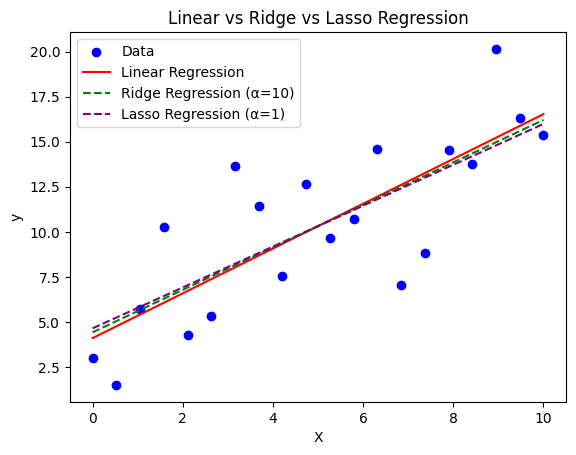

In [19]:

from sklearn.linear_model import Lasso

# Skapa lite "noisy" data
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(20) * 4  # linjär trend + brus

# Linjär regression
lin = LinearRegression().fit(X, y)

# Ridge regression (med alpha=10 som exempel)
ridge = Ridge(alpha=10).fit(X, y)

# Lasso regression (med alpha=1 som exempel)
lasso = Lasso(alpha=1).fit(X, y)

# Prediktioner
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_lin_pred = lin.predict(X_line)
y_ridge_pred = ridge.predict(X_line)
y_lasso_pred = lasso.predict(X_line)

# Rita
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_line, y_lin_pred, color="red", label="Linear Regression")
plt.plot(X_line, y_ridge_pred, color="green", linestyle="--", label="Ridge Regression (α=10)")
plt.plot(X_line, y_lasso_pred, color="purple", linestyle="--", label="Lasso Regression (α=1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Ridge vs Lasso Regression")
plt.legend()
plt.show()


d) *Elastic net* - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

<span style="color:green">
Elastic Net är en kombination av **Ridge (L2)** och **Lasso (L1)** regression.  
Det använder en blandning av båda regulariseringarna:

$$
\text{Cost} = \sum (y_i - \hat{y_i})^2 + \alpha \big( l1\_ratio \cdot \sum |\beta_j| + (1 - l1\_ratio) \cdot \sum \beta_j^2 \big)
$$

- **α (alpha)** = styrkan på regulariseringen  
- **l1_ratio** = balansen mellan Lasso och Ridge  
  - `l1_ratio = 1` → samma som Lasso  
  - `l1_ratio = 0` → samma som Ridge  
  - `0 < l1_ratio < 1` → blandning av båda
</span>

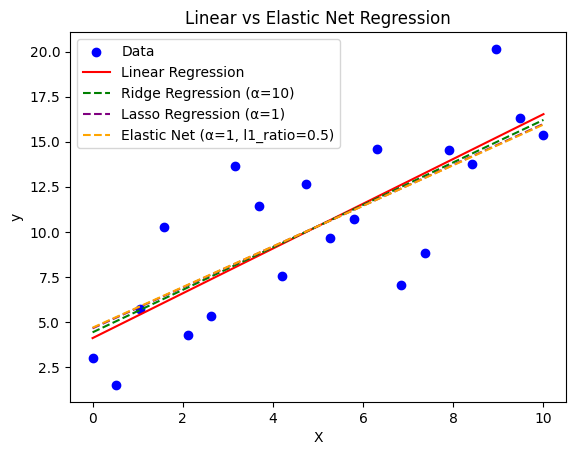

In [20]:

from sklearn.linear_model import ElasticNet

# Skapa lite "noisy" data
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(20) * 4  # linjär trend + brus

# Linjär regression
lin = LinearRegression().fit(X, y)

# Ridge regression (med alpha=10 som exempel)
ridge = Ridge(alpha=10).fit(X, y)

# Lasso regression (med alpha=1 som exempel)
lasso = Lasso(alpha=1).fit(X, y)

# Elastic Net regression (med alpha=1, l1_ratio=0.5 som exempel)
elastic = ElasticNet(alpha=1, l1_ratio=0.5).fit(X, y)

# Prediktioner
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_lin_pred = lin.predict(X_line)
y_ridge_pred = ridge.predict(X_line)
y_lasso_pred = lasso.predict(X_line)
y_elastic_pred = elastic.predict(X_line)

# Rita
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_line, y_lin_pred, color="red", label="Linear Regression")
plt.plot(X_line, y_ridge_pred, color="green", linestyle="--", label="Ridge Regression (α=10)")
plt.plot(X_line, y_lasso_pred, color="purple", linestyle="--", label="Lasso Regression (α=1)")
plt.plot(X_line, y_elastic_pred, color="orange", linestyle="--", label="Elastic Net (α=1, l1_ratio=0.5)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs Elastic Net Regression")
plt.legend()
plt.show()


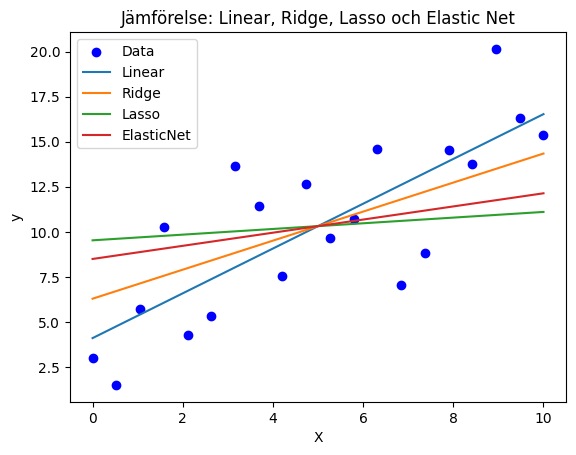

,Model,RMSE
0,Linear,2.955564
1,Ridge,3.240060
2,Lasso,4.426342
3,ElasticNet,3.980909


RMSE-resultat:


,Model,RMSE
0,Linear,2.955564
1,Ridge,3.240060
2,Lasso,4.426342
3,ElasticNet,3.980909


Bästa modellen är: Linear med RMSE = 2.956


In [21]:

import pandas as pd
from sklearn.metrics import root_mean_squared_error

# Skapa lite "noisy" data
np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(20) * 4  # linjär trend + brus

# Definiera modeller
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=100),
    "Lasso": Lasso(alpha=10),
    "ElasticNet": ElasticNet(alpha=10, l1_ratio=0.7)
}

# Skapa linje för prediktioner
X_line = np.linspace(0, 10, 100).reshape(-1, 1)

# Spara resultat för tabellen
results = []

plt.scatter(X, y, color="blue", label="Data")

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_line)
    rmse = root_mean_squared_error(y, model.predict(X))
    results.append({"Model": name, "RMSE": rmse})
    plt.plot(X_line, y_pred, label=f"{name}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Jämförelse: Linear, Ridge, Lasso och Elastic Net")
plt.legend()
plt.show()

# Visa RMSE-tabell
results_df = pd.DataFrame(results)
display(results_df)

# Välj bästa modell
best_model = results_df.loc[results_df["RMSE"].idxmin()]

print("RMSE-resultat:")
display(results_df)

print(f"Bästa modellen är: {best_model['Model']} med RMSE = {best_model['RMSE']:.3f}")



e) *Support vector machines* - [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

<span style="color:green">
Support Vector Machines är en metod som kan användas både för **klassificering** och **regression**.  
Idén är att hitta en linje (eller ett plan i högre dimensioner) som bäst separerar eller förklarar data.

För regression kallas det **Support Vector Regression (SVR)**:

- Modellen försöker passa en funktion som ligger inom ett “rör” runt datapunkterna.  
- Punkter utanför röret blir fel som modellen försöker minimera.  
- Hyperparametrar:
  - **C**: straff för fel utanför röret (stort C = liten tolerans för fel).  
  - **ε (epsilon)**: bredden på röret (stort ε = modellen tillåter mer avvikelse).  
  - **kernel**: vilken typ av funktion som används (linjär, polynomiell, RBF osv).  
</span>

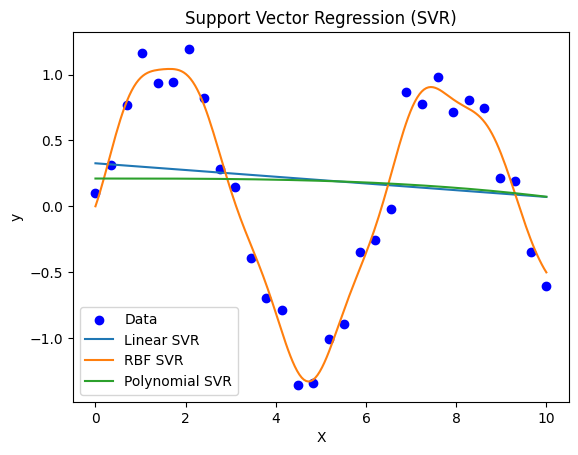

,Model,RMSE
0,Linear SVR,0.747419
1,RBF SVR,0.127956
2,Polynomial SVR,0.754460


In [22]:
from sklearn.svm import SVR

# Skapa lite "noisy" data
np.random.seed(42)
X = np.linspace(0, 10, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.randn(30) * 0.2  # icke-linjärt samband

# Definiera modeller
models = {
    "Linear SVR": SVR(kernel="linear", C=100, epsilon=0.1),
    "RBF SVR": SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.1),
    "Polynomial SVR": SVR(kernel="poly", C=100, degree=3, epsilon=0.1)
}

# Skapa linje för prediktioner
X_line = np.linspace(0, 10, 200).reshape(-1, 1)

# Rita data
plt.scatter(X, y, color="blue", label="Data")

# Utvärdera och plotta
results = []
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_line)
    rmse = root_mean_squared_error(y, model.predict(X))
    results.append({"Model": name, "RMSE": rmse})
    plt.plot(X_line, y_pred, label=name)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression (SVR)")
plt.legend()
plt.show()

# Tabell med resultat
results_df = pd.DataFrame(results)
display(results_df)


f) Beslutsträd - [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

<span style="color:green">
Ett beslutsträd delar upp datan i olika regioner genom att ställa frågor:  
"Är X < 5?", "Är X > 2?" osv.  

- Vid varje delning försöker trädet minimera felet inom varje delmängd.  
- Till slut gör modellen en prediktion som är medelvärdet av y-värdena i varje blad.  
- Fördelar:
  - Lätt att tolka
  - Fångar icke-linjära samband
- Nackdelar:
  - Kan överanpassa (overfit) om trädet blir för djupt  
- Viktiga hyperparametrar:
  - **max_depth**: maximalt antal nivåer i trädet  
  - **min_samples_split**: minsta antal prover för att dela en nod  
  - **min_samples_leaf**: minsta antal prover i ett blad
</span>

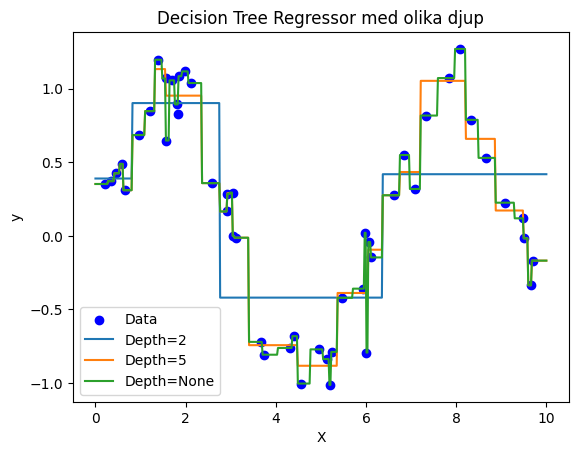

,Model,RMSE
0,Depth=2,0.379394
1,Depth=5,0.122666
2,Depth=None,0.000000


In [23]:
from sklearn.tree import DecisionTreeRegressor

# Skapa lite "noisy" data
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.randn(50) * 0.2  # icke-linjärt samband

# Definiera modeller med olika träd-djup
models = {
    "Depth=2": DecisionTreeRegressor(max_depth=2, random_state=42),
    "Depth=5": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Depth=None": DecisionTreeRegressor(random_state=42)  # fritt djup
}

# Skapa linje för prediktioner
X_line = np.linspace(0, 10, 500).reshape(-1, 1)

# Rita data
plt.scatter(X, y, color="blue", label="Data")

# Utvärdera och plotta
results = []
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_line)
    rmse = root_mean_squared_error(y, model.predict(X))
    results.append({"Model": name, "RMSE": rmse})
    plt.plot(X_line, y_pred, label=name)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regressor med olika djup")
plt.legend()
plt.show()

# Tabell med resultat
results_df = pd.DataFrame(results)
display(results_df)


g) *Ensemble learning* - [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) och [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

h) *Random forest* - [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

7. Vad menas med *white box* modeller och *black box* modeller? 

<span style="color:green">

White box - där kan vi lätt se varför modellen gör en viss prediktion, som beslutsträd.

Black box - där kan vi följa med rent matematiskt i uträkningarna, men det är svårt att
intuitivt förklara i ord varför modellen gör som den gör, neurla nätverk och random forest.

</span>

8. Vad är skillnaden mellan *bagging* och *pasting*?

<span style="color:green">

Om man utgår från att man har ett givet dataset, så kan man skapa nya dataset
genom antingen <i style="color:white">bagging</i> eller <i style="color:white">pasting</i>.

Bagging - innebär att samma observation kan förekomma flera gånger för det nya datasetet som skapas.

Pasting - innebär, tvärtom, samma observation kan <i style="color:white"><b>inte</b></i> förekomma flera gånger
för datasetet som skapas.

</span>

## Resonemangfrågor

9. Förklara hur man kan tolka figur 3.1 på sidan 113. 

<span style="color:green">

Det är en linjär regressionsmodell som försöker prediktera inkomst(y)
baserat på ålder(x).
Lutningen (intercept), svarar på frågan hur mycket inkomsten ökar, när
vi också ökar åldern.
De röda linjerna visar residualer (outliers)

</span>

10. Förklara hur man kan tolka figur 3.13 på sidan 140. Hur hänger den ihop med figur 3.14 på sidan 141? 

11. Gå igenom samtliga kodexempel i kapitlet och skriv gärna av koden manuellt. Det är även bra att experimentera genom att ändra vissa delar av koden och läsa dokumentationen. 

In [32]:
# Beräkna och skriv ut MSE

from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_squared_error(y_true, y_pred)

0.375

In [33]:
# Beräkna och skriv ut MSE

from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_absolute_error(y_true, y_pred)

0.5

In [34]:
from sklearn.metrics import root_mean_squared_error

y_true = [100, 80]
y_pred_model_1 = [90, 75]
y_pred_model_2 = [90, 15]

MAE1 = mean_absolute_error(y_true, y_pred_model_1)
MAE2 = mean_absolute_error(y_true, y_pred_model_2)

RMSE1 = root_mean_squared_error(y_true, y_pred_model_1)
RMSE2 = root_mean_squared_error(y_true, y_pred_model_2)

print("MAE1 =", MAE1)
print("MAE2 =", MAE2)
print("RMSE1 =", RMSE1)
print("RMSE2 =", RMSE2)

# RMSE lägger ett större straff på stora avvikelser

MAE1 = 7.5
MAE2 = 37.5
RMSE1 = 7.905694150420948
RMSE2 = 46.502688094345686


12. Datasetet "hr_employee_data.xlsx" innehåller data kopplat till ett företags anställda. Gör en *EDA* och tillhörande analys, föreställ dig att ledningsgruppen på ett företag ska ta del av analysen. I denna uppgift ska ingen ML-modellering göras (det kommer göras i nästa kapitel). Syftet är dels att träna på att genomföra analyser dels att demonstrera hur mycket man kan göra även utan ML-modellering.  